In [1]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'pongthorn' # Project ID inserted based on the query results selected to explore
location = 'asia-southeast1' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=pongthorn:asia-southeast1:bquxjob_4c21d15f_184323b80d7)
back to BigQuery to edit the query within the BigQuery user interface.

In [2]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_4c21d15f_184323b80d7') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT  *  FROM  ML.EXPLAIN_FORECAST(MODEL  pongthorn.FinMarketML.x_index_ema_model,  STRUCT(250 AS horizon, 0.9 AS confidence_level))


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [4]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_4c21d15f_184323b80d7') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()


,time_series_timestamp,time_series_type,time_series_data,time_series_adjusted_data,standard_error,confidence_level,prediction_interval_lower_bound,prediction_interval_upper_bound,trend,seasonal_period_yearly,seasonal_period_quarterly,seasonal_period_monthly,seasonal_period_weekly,seasonal_period_daily,holiday_effect,spikes_and_dips,step_changes
0,2009-01-02 00:00:00+00:00,history,88.830000,88.830000,0.195918,NaN,NaN,NaN,0.000000,2.490152,None,None,None,None,0.0,0.0,None
1,2009-01-03 00:00:00+00:00,history,88.933333,88.896652,0.195918,NaN,NaN,NaN,86.392613,2.504039,None,None,None,None,0.0,0.0,None
2,2009-01-04 00:00:00+00:00,history,89.036667,89.042762,0.195918,NaN,NaN,NaN,86.499861,2.542902,None,None,None,None,0.0,0.0,None
3,2009-01-05 00:00:00+00:00,history,89.140000,89.152332,0.195918,NaN,NaN,NaN,86.557571,2.594761,None,None,None,None,0.0,0.0,None
4,2009-01-06 00:00:00+00:00,history,89.470000,89.294634,0.195918,NaN,NaN,NaN,86.601579,2.693055,None,None,None,None,0.0,0.0,None


In [6]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3901 entries, 0 to 3900
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype              
---  ------                           --------------  -----              
 0   time_series_timestamp            3901 non-null   datetime64[ns, UTC]
 1   time_series_type                 3901 non-null   object             
 2   time_series_data                 3901 non-null   float64            
 3   time_series_adjusted_data        3901 non-null   float64            
 4   standard_error                   3901 non-null   float64            
 5   confidence_level                 250 non-null    float64            
 6   prediction_interval_lower_bound  250 non-null    float64            
 7   prediction_interval_upper_bound  250 non-null    float64            
 8   trend                            3901 non-null   float64            
 9   seasonal_period_yearly           3901 non-null   float64            
 10  

In [11]:
# from datetime import datetime
# start_date=datetime.strptime('2016-01-01','%Y-%m-%d' )
# end_date=datetime.strptime('2019-12-31','%Y-%m-%d' )
mydata=results[ results['time_series_timestamp']>'2017-01-01']

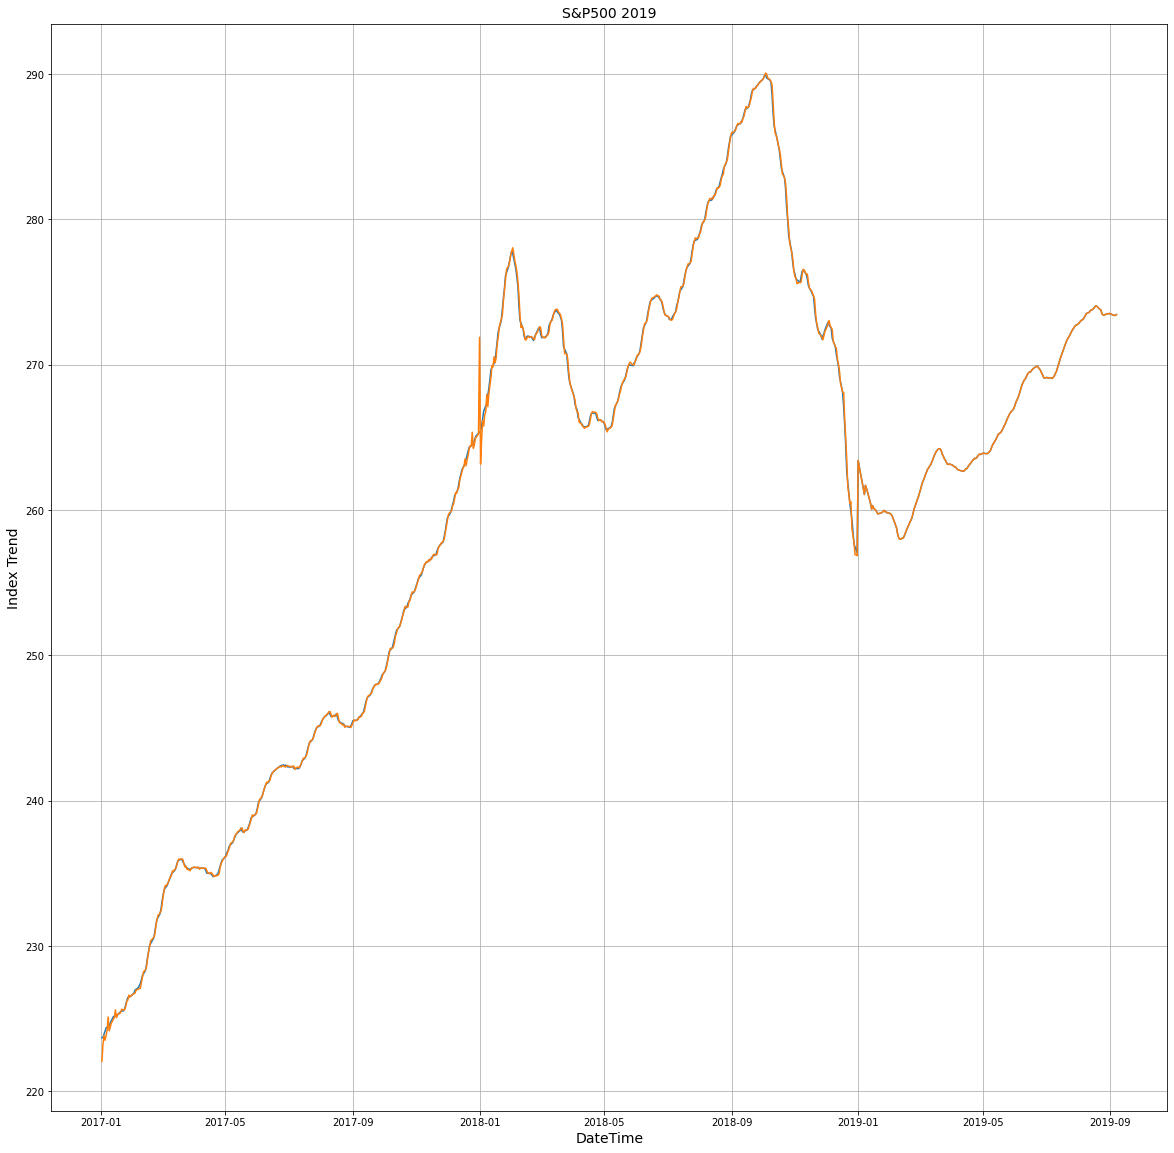

In [15]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html
#https://www.geeksforgeeks.org/time-series-plot-or-line-plot-with-pandas/
cols_show=['time_series_timestamp','time_series_data','time_series_adjusted_data']


import matplotlib.pyplot as plt
f = plt.figure(figsize=(20,20))
plt.plot(mydata['time_series_timestamp'], mydata['time_series_data'])
plt.plot(mydata['time_series_timestamp'], mydata['time_series_adjusted_data'])
plt.title('S&P500 2019', fontsize=14)
plt.xlabel('DateTime', fontsize=14)
plt.ylabel('Index Trend', fontsize=14)
plt.grid(True)
plt.show()



## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [ ]:
results.describe()